<a href="https://colab.research.google.com/github/ipavlopoulos/paremia/blob/main/proverbs_chord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
init_notebook_mode(connected=True)

* We get the proverbs that have been recorded in at least two areas.

In [2]:
proverbs_url = 'https://raw.githubusercontent.com/ipavlopoulos/paremia/main/data/duplicates_geolocated.csv'
widespread_proverbs = pd.read_csv(proverbs_url)
widespread_proverbs.sample(2)

text  \
2034                   Μουρλός άνθρωπος, οργή Θεού   
3120  Των ακριβών τα πράματα, τα τρων οι χαροκόποι   

                                     place  place_num                    area  \
2034          {'Επτάνησος', 'Αχαΐα>Πάτρα'}          2  {'Επτάνησος', 'Αχαΐα'}   
3120  {'Κρήτη>Ινναχώριο>Τοπόλια', 'Ρόδος'}          2      {'Κρήτη', 'Ρόδος'}   

      area_num                                             latlon  
2034         2  [(38.8351105, 20.7094392), (38.0692748, 21.872...  
3120         2  [(35.3084952, 24.46334231842296), (36.17262995...

* Indeed:

In [3]:
widespread_proverbs.area_num.value_counts()

area_num
2     2322
3      441
4      189
5      117
6       52
7       18
9       16
8       16
10       9
11       7
12       4
16       4
13       3
18       1
23       1
17       1
15       1
14       1
20       1
Name: count, dtype: int64

In [4]:
from ast import literal_eval # get it back to what it was
widespread_proverbs.latlon = widespread_proverbs.latlon.apply(literal_eval)
widespread_proverbs.area = widespread_proverbs.area.apply(literal_eval)

* Focus on the proverbs that exist in *exactly* two locations.

In [5]:
doubly_loc = widespread_proverbs[widespread_proverbs.latlon.apply(len)==2]

In [6]:
import folium
from folium import Choropleth, Circle, CircleMarker, Marker # not needed yet
from folium.plugins import MarkerCluster # ditto

m = folium.Map(location=[39.0742, 21.8243], zoom_start=6, tiles="cartodb positron")
for i in range(doubly_loc.shape[0]):
    # get the coordinates of each area for this proverb
    loc = doubly_loc.iloc[i].latlon
    folium.PolyLine(loc, color='red', weight=1, opacity=0.025
                   ).add_to(m)
m

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
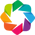

In [7]:
import holoviews as hv
from holoviews import opts, dim
import holoviews.plotting.bokeh
hv.extension('bokeh')
hv.output(size=200)

In [11]:
doubly_loc.area.explode()

array(['Ήπειρος', 'Λακωνία', 'Νίσυρος', 'Μικρά Ασία', 'Θήρα (Σαντορίνη)',
       'Θράκη', 'Κεφαλληνία', 'Θεσσαλία', 'Αρκαδία', 'Κρήτη', 'Επτάνησος',
       'Ιωάννινα', 'Ρόδος', 'Σκύρος', 'Κορινθία',
       'Δαρδανέλλια (Ελλήσποντος)', 'Αχαΐα', 'Σίφνος', 'Βόρειος Ήπειρος',
       'Κέρκυρα', 'Κάρπαθος', 'Κως', 'Αδριανούπολη', 'Κάλυμνος', 'Εύβοια',
       'Λέρος', 'Αμοργός', 'Ανατολική Θράκη', 'Μεσσηνία', 'Μακεδονία',
       'Θεσπρωτία', 'Κύπρος', 'Νάξος', 'Κοζάνη', 'Πάρος', 'Μάνη', 'Σάμος',
       'Λέσβος', 'Τήνος', 'Πήλιο', 'Αιτωλοακαρνανία', 'Πελοπόννησος',
       'Ανάφη', 'Σέρρες', 'Ρούμελη', 'Καστοριά', 'Αιτωλία', 'Πόντος',
       'Λήμνος', 'Ιθάκη', 'Άγιον Όρος', 'Φιλιππούπολη', 'Ηλεία',
       'Ζάκυνθος', 'Αττική', 'Ημαθία', 'Αθήνα', 'Τριφυλία', 'Αργολίδα',
       'Άνδρος', 'Παξοί', 'Τήλος', 'Λάρισα', 'Χίος', 'Βοιωτία',
       'Καρδίτσα', 'Λευκάδα', 'Σμύρνη', 'Μήλος', 'Πρέβεζα', 'Σύμη',
       'Νάουσα', 'Θεσσαλονίκη', 'Κύθνος', 'Κέα', 'Ικαρία', 'Αερόπολη',
       'Σύρος', 'Σαμοθράκη

In [14]:
node_names = {loc:i for i,loc in enumerate(doubly_loc.area.explode().unique())}
edges={}
for i in range(doubly_loc.shape[0]):
    print(doubly_loc.iloc[i].area)
    loc1, loc2 = doubly_loc.iloc[i].area
    l1, l2 = node_names[loc1], node_names[loc2]
    key = str({l1,l2}) # hashing while keeping unique order
    if key not in edges:
        edges[key] = 1
    else:
        edges[key] += 1

{'Ήπειρος', 'Λακωνία'}
{'Νίσυρος', 'Μικρά Ασία'}
{'Θήρα (Σαντορίνη)', 'Θράκη'}
{'Ήπειρος', 'Κεφαλληνία'}
{'Θεσσαλία', 'Αρκαδία'}
{'Κρήτη', 'Κεφαλληνία'}
{'Επτάνησος', 'Ιωάννινα'}
{'Κρήτη', 'Θράκη'}
{'Ρόδος', 'Σκύρος'}
{'Θεσσαλία', 'Λακωνία'}
{'Κορινθία', 'Αρκαδία'}
{'Λακωνία', 'Σκύρος'}
{'Δαρδανέλλια (Ελλήσποντος)', 'Θράκη'}
{'Ήπειρος', 'Επτάνησος'}
{'Ήπειρος', 'Μικρά Ασία'}
{'Αχαΐα', 'Σίφνος'}
{'Κεφαλληνία', 'Μικρά Ασία'}
{'Βόρειος Ήπειρος', 'Κέρκυρα'}
{'Μικρά Ασία', 'Κάρπαθος'}
{'Κως', 'Κάρπαθος'}
{'Αδριανούπολη', 'Θράκη'}
{'Ρόδος', 'Κάλυμνος'}
{'Εύβοια', 'Αρκαδία'}
{'Αδριανούπολη', 'Λέρος'}
{'Αμοργός', 'Ανατολική Θράκη'}
{'Ανατολική Θράκη', 'Μικρά Ασία'}
{'Μεσσηνία', 'Θράκη'}
{'Μακεδονία', 'Θράκη'}
{'Ήπειρος', 'Θεσπρωτία'}
{'Κεφαλληνία', 'Σίφνος'}
{'Μεσσηνία', 'Αρκαδία'}
{'Αδριανούπολη', 'Μακεδονία'}
{'Ήπειρος', 'Κρήτη'}
{'Αμοργός', 'Κρήτη'}
{'Αχαΐα', 'Αρκαδία'}
{'Μικρά Ασία', 'Κύπρος'}
{'Ήπειρος', 'Λακωνία'}
{'Μεσσηνία', 'Λακωνία'}
{'Αχαΐα', 'Μεσσηνία'}
{'Ήπειρος', 'Κρήτη'}
{'Νάξος

In [13]:
edges

{'{0, 1}': 53,
 '{2, 3}': 3,
 '{4, 5}': 2,
 '{0, 6}': 9,
 '{8, 7}': 1,
 '{9, 6}': 7,
 '{10, 11}': 1,
 '{9, 5}': 10,
 '{12, 13}': 4,
 '{1, 7}': 106,
 '{8, 14}': 6,
 '{1, 13}': 1,
 '{5, 15}': 6,
 '{0, 10}': 6,
 '{0, 3}': 13,
 '{16, 17}': 1,
 '{3, 6}': 6,
 '{18, 19}': 1,
 '{3, 20}': 5,
 '{20, 21}': 1,
 '{5, 22}': 20,
 '{12, 23}': 2,
 '{24, 8}': 5,
 '{25, 22}': 1,
 '{26, 27}': 10,
 '{3, 27}': 14,
 '{28, 5}': 3,
 '{5, 29}': 10,
 '{0, 30}': 12,
 '{17, 6}': 1,
 '{8, 28}': 21,
 '{29, 22}': 7,
 '{0, 9}': 17,
 '{9, 26}': 16,
 '{16, 8}': 40,
 '{3, 31}': 2,
 '{1, 28}': 22,
 '{16, 28}': 3,
 '{32, 12}': 1,
 '{8, 11}': 5,
 '{27, 5}': 21,
 '{33, 29}': 10,
 '{8, 6}': 10,
 '{34, 3}': 1,
 '{1, 35}': 30,
 '{0, 8}': 14,
 '{36, 6}': 1,
 '{37, 15}': 1,
 '{37, 38}': 2,
 '{5, 39}': 1,
 '{40, 2}': 1,
 '{41, 1}': 6,
 '{42, 20}': 1,
 '{43, 22}': 3,
 '{27, 30}': 6,
 '{16, 33}': 4,
 '{26, 20}': 2,
 '{32, 9}': 8,
 '{16, 5}': 15,
 '{16, 0}': 18,
 '{26, 4}': 6,
 '{8, 30}': 8,
 '{44, 5}': 2,
 '{3, 11}': 6,
 '{45, 22}':

In [24]:
doubly_loc.area.apply(lambda x: frozenset(x)).value_counts()

area
(Θεσσαλία, Λακωνία)     106
(Λακωνία, Ανάφη)         84
(Ήπειρος, Ιωάννινα)      81
(Αθήνα, Λακωνία)         79
(Ήπειρος, Λακωνία)       53
                       ... 
(Άνδρος, Σάμος)           1
(Ήπειρος, Άνδρος)         1
(Πάρος, Μικρά Ασία)       1
(Ήπειρος, Ακαρνανία)      1
(Φωκίδα, Θεσσαλία)        1
Name: count, Length: 639, dtype: int64

In [27]:
doubly_loc.area.apply(lambda x: frozenset(x)).value_counts().to_dict()

{frozenset({'Θεσσαλία', 'Λακωνία'}): 106,
 frozenset({'Ανάφη', 'Λακωνία'}): 84,
 frozenset({'Ήπειρος', 'Ιωάννινα'}): 81,
 frozenset({'Αθήνα', 'Λακωνία'}): 79,
 frozenset({'Ήπειρος', 'Λακωνία'}): 53,
 frozenset({'Θεσπρωτία', 'Ιωάννινα'}): 50,
 frozenset({'Αρκαδία', 'Λακωνία'}): 41,
 frozenset({'Αρκαδία', 'Αχαΐα'}): 40,
 frozenset({'Θράκη', 'Μικρά Ασία'}): 36,
 frozenset({'Ζάκυνθος', 'Λακωνία'}): 34,
 frozenset({'Λακωνία', 'Μάνη'}): 30,
 frozenset({'Αμοργός', 'Λακωνία'}): 29,
 frozenset({'Ήπειρος', 'Μακεδονία'}): 26,
 frozenset({'Αχαΐα', 'Επτάνησος'}): 22,
 frozenset({'Λακωνία', 'Μεσσηνία'}): 22,
 frozenset({'Αχαΐα', 'Λακωνία'}): 21,
 frozenset({'Αρκαδία', 'Μεσσηνία'}): 21,
 frozenset({'Ανατολική Θράκη', 'Θράκη'}): 21,
 frozenset({'Αδριανούπολη', 'Θράκη'}): 20,
 frozenset({'Επτάνησος', 'Κεφαλληνία'}): 18,
 frozenset({'Ήπειρος', 'Αχαΐα'}): 18,
 frozenset({'Μάνη', 'Μεσσηνία'}): 18,
 frozenset({'Ήπειρος', 'Κρήτη'}): 17,
 frozenset({'Αμοργός', 'Κρήτη'}): 16,
 frozenset({'Αχαΐα', 'Θράκη'}): 1

In [33]:
from collections import defaultdict
from collections import Counter

doubly_loc.area.apply(lambda x: frozenset(x)).value_counts()
# edges1 = { (node_names[loc1], node_names[loc2]): c 
#           for (loc1, loc2), c in doubly_loc.area.apply(lambda x: frozenset(x)).value_counts().items()
# }
# edges1

area
(Θεσσαλία, Λακωνία)     106
(Λακωνία, Ανάφη)         84
(Ήπειρος, Ιωάννινα)      81
(Αθήνα, Λακωνία)         79
(Ήπειρος, Λακωνία)       53
                       ... 
(Άνδρος, Σάμος)           1
(Ήπειρος, Άνδρος)         1
(Πάρος, Μικρά Ασία)       1
(Ήπειρος, Ακαρνανία)      1
(Φωκίδα, Θεσσαλία)        1
Name: count, Length: 639, dtype: int64

In [10]:
matrix_df = pd.DataFrame([(list(literal_eval(m))[0], list(literal_eval(m))[1], edges[m]) for m in edges],
                         columns=('source', 'target', 'value'))
matrix_df.sample(10)

source  target  value
93        1      51      6
269       2      12      3
186      29      46      1
441      25      20      1
494      14      30      1
623      33     100      1
585      33      47      1
79        3      22     10
153       1      62      1
56       26      20      2

In [11]:
loc_name = {'Ήπειρος':'Epirus', 'Αιτωλία':'Etolia', 'Αμοργός':'Amorgos', 'Ανατολική Θράκη': 'East Thrace',
            'Αρκαδία':'Arcadia', 'Αχαΐα':'Achaia', 'Επτάνησος':'Eptanisos', 'Εύβοια':'Evia', 'Θεσπρωτία':'Thesprotia',
            'Θράκη': 'Thrace', 'Ιωάννινα':'Ioannina', 'Κάρπαθος':'Karpathos', 'Κεφαλληνία':'Cephalonia', 'Κρήτη':'Crete',
            'Κύπρος':'Cyprus', 'Λέσβος':'Lesvos', 'Λακωνία':'Laconia', 'Μακεδονία':'Macedonia', 'Μικρά Ασία':'Asia Minor',
            'Νάξος':'Naxos', 'Πόντος':'Pontos', 'Ρόδος':'Rhodes', 'Σκύρος':'Skyros',
            'Νίσυρος': 'Nisyros', 'Θήρα (Σαντορίνη)': 'Thera', 'Θεσσαλία': 'Thessalia', 'Κορινθία': 'Korinthia',
            'Δαρδανέλλια (Ελλήσποντος)': 'Dardanellia', 'Σίφνος': 'Sifnos', 'Βόρειος Ήπειρος': 'Northern Epirus',
            'Κέρκυρα': 'Corfu', 'Κως': 'Kos', 'Άγιον Όρος': 'Agion Oros', 'Άνδρος': 'Andros', 'Άρτα': 'Arta', 'Ίμβρος': 'Imvros', 
            'Αίγινα': 'Egina', 'Αδριανούπολη': 'Adrianoupoli', 'Αερόπολη': 'Aeropoli', 'Αθήνα': 'Athens', 
            'Αιτωλοακαρνανία': 'Aitoloakarnania', 'Ακαρνανία': 'Akarnania', 'Ανάφη': 'Anafi', 'Ανατολική Κρήτη': 'East Crete', 
            'Ανδρίτσαινα Ολυμπίου': 'Andritsena Olympiou','Αργολίδα': 'Argolida', 'Αστυπάλαια': 'Astypalaia', 'Αττική': 'Attica', 
            'Βοιωτία': 'Boeotia', 'Ευρυτανία': 'Eurytania', 'Ζάκυνθος': 'Zakynthos', 'Ηλεία': 'Ileia', 'Ημαθία': 'Imathia', 
            'Θεσσαλονίκη': 'Thessaloniki', 'Ιθάκη': 'Ithaca', 'Ικαρία': 'Icaria', 'Κάλυμνος': 'Calymnos', 'Κάσος': 'Casos', 'Κέα': 'Kea', 
            'Καππαδοκία': 'Cappadocia', 'Καρδίτσα': 'Karditsa', 'Καστελλόριζο (Μεγίστη)': 'Castellorizo', 'Καστοριά': 'Castoria', 
            'Κοζάνη': 'Cozani', 'Κύθηρα': 'Kythira', 'Κύθνος': 'Kythnos', 'Λάρισα': 'Larissa', 'Λέρος': 'Leros', 'Λήμνος': 'Lemnos', 
            'Λαμία': 'Lamia', 'Λευκάδα': 'Leukada', 'Μάλγαρα': 'Malgara', 'Μάνη': 'Mani', 'Μήλος': 'Milos', 'Μαγνησία': 'Magnesia', 
            'Μεσσηνία': 'Messinia', 'Μύκονος': 'Myconos', 'Νάουσα': 'Naousa', 'Ολυμπία': 'Olympia', 'Πάρος': 'Paros', 'Πέλλα': 'Pella', 
            'Πήλιο': 'Pelion', 'Τήνος': 'Tinos', 'Παξοί': 'Paxoi', 'Παρνασσός': 'Parnassos', 'Πελοπόννησος': 'Peloponnese', 
            'Πρέβεζα': 'Preveza', 'Ρούμελη': 'Roumeli', 'Σάμος': 'Samos', 'Σέρρες': 'Serres', 'Σαμοθράκη': 'Samothrace',
            'Σμύρνη':'Smyrni', 'Στερεά Ελλάδα': 'Central Greece', 'Σύμη': 'Symi', 'Σύρος': 'Syros', 'Τήλος': 'Telos', 
            'Τριφυλία': 'Trifylllia', 'Φθιώτιδα': 'Fthiotida', 'Φιλιππούπολη': 'Filippoupoli', 'Φωκίδα': 'Fokida', 'Χίος': 'Chios'}

In [40]:
nodes_df = pd.DataFrame({'nodes': [loc_name[n] for n in node_names]},
                        index=[node_names[n] for n in node_names])
print(nodes.shape)
nodes_df.sample(10)

(105, 2)


nodes
20    Messinia
5        Thera
48      Lesvos
83  Samothrace
18       Leros
69   Zakynthos
49       Tinos
74       Paxoi
32      Cyprus
66     Kythnos

In [13]:
# add node labels
nodes = hv.Dataset(nodes_df, 'index')
# create chord object, selecting connections with a 
# weight of at least 5
chord = hv.Chord((matrix_df, nodes)).select(value=(5, None))
#customization of chart
chord.opts(opts.Chord(cmap='Category20',
                      edge_cmap='Category20',
                      edge_color=dim('source').str(),
                      label_text_font_size='12pt',
                      labels='nodes',
                      node_color=dim('index').str()))

:Chord   [source,target]   (value)

In [14]:
from bokeh.plotting import show, output_file
output_file('chord.html')
show(hv.render(chord))

In [15]:
doubly_loc.area.explode().value_counts()[:5]

area
Λακωνία    620
Ήπειρος    326
Αρκαδία    260
Αχαΐα      234
Θράκη      233
Name: count, dtype: int64

* Now do the same for proverbs that exist in *at least* two locations.

In [16]:
multi_loc = widespread_proverbs[widespread_proverbs.latlon.apply(len) >= 2]
multi_loc

text  \
0                     (Ε)πήρε βάγια   
1     Άβολος ο νους, διπλός ο κόπος   
2         Άβουλος νους διπλός κόπος   
3      Άβουλος νους, διπλός ο κόπος   
4     Άβουλος ο νους διπλός ο κόπος   
...                             ...   
3199                 ο παθός, μαθός   
3200                πονάει το δόντι   
3201       που Πάτρα, που Φλομίτσι!   
3202           τού έδειξε τα δόντια   
3203            τού'δειξε τα δόντια   

                                                  place  place_num  \
0                                {'Ήπειρος', 'Λακωνία'}          2   
1             {'Νίσυρος', 'Μικρά Ασία>Τσεσμές (Κρήνη)'}          2   
2                   {'Θήρα (Σαντορίνη)', 'Θράκη>Αίνος'}          2   
3                         {'Αμοργός', 'Κρήτη', 'Ρόδος'}          3   
4     {'Ρόδος', 'Σάμος>Μαραθόκαμπος', 'Θράκη>Μάδυτος...          5   
...                                                 ...        ...   
3199                   {'Λέρος', 'Αργολίδα>Σχοινοχώρι'}          2   
3200                     {'Θεσσαλία>Τρίκαλα', 'Φωκίδα'}          2   
3201              {'Μάνη>Αβία', 'Μεσσηνία>Αβία>Κάμπος'}          2   
3202                        {'Αρκαδία>Τεγέα', 'Εύβοια'}          2   
3203              {'Μεσσηνία>Ζέγα', 'Λακωνία>Αναβρυτή'}          2   

                                area  area_num  \
0                 {Λακωνία, Ήπειρος}         2   
1              {Νίσυρος, Μικρά Ασία}         2   
2          {Θράκη, Θήρα (Σαντορίνη)}         2   
3            {Ρόδος, Αμοργός, Κρήτη}         3   
4     {Ρόδος, Σάμος, Θράκη, Ήπειρος}         4   
...                              ...       ...   
3199               {Αργολίδα, Λέρος}         2   
3200              {Φωκίδα, Θεσσαλία}         2   
3201                {Μάνη, Μεσσηνία}         2   
3202               {Αρκαδία, Εύβοια}         2   
3203             {Λακωνία, Μεσσηνία}         2   

                                                 latlon  
0     [(37.9574332, 23.7108518), (36.76027945, 22.79...  
1     [(36.58904575, 27.16918402255752), (38.1846366...  
2     [(40.8464241, 25.8759377), (36.4044251, 25.395...  
3     [(36.85252415, 25.89848696771565), (35.3084952...  
4     [(40.8464241, 25.8759377), (37.9574332, 23.710...  
...                                                 ...  
3199  [(37.56626615, 22.85593894780862), (37.1494507...  
3200  [(38.4998681, 22.24878032919352), (39.5594194,...  
3201  [(36.986899050000005, 21.82712495001949), (41....  
3202  [(38.0368583, 23.6689264), (38.49417235, 23.91...  
3203  [(36.986899050000005, 21.82712495001949), (36....  

[3204 rows x 6 columns]

In [17]:
node_names = {loc:i for i,loc in enumerate(multi_loc.area.explode().unique())}
node_names

{'Λακωνία': 0,
 'Ήπειρος': 1,
 'Νίσυρος': 2,
 'Μικρά Ασία': 3,
 'Θράκη': 4,
 'Θήρα (Σαντορίνη)': 5,
 'Ρόδος': 6,
 'Αμοργός': 7,
 'Κρήτη': 8,
 'Σάμος': 9,
 'Άνδρος': 10,
 'Επτάνησος': 11,
 'Θεσπρωτία': 12,
 'Κεφαλληνία': 13,
 'Αρκαδία': 14,
 'Θεσσαλία': 15,
 'Αδριανούπολη': 16,
 'Ιωάννινα': 17,
 'Λέρος': 18,
 'Σκύρος': 19,
 'Μεσσηνία': 20,
 'Αργολίδα': 21,
 'Αχαΐα': 22,
 'Κορινθία': 23,
 'Σύμη': 24,
 'Χίος': 25,
 'Ανατολική Θράκη': 26,
 'Δαρδανέλλια (Ελλήσποντος)': 27,
 'Σίφνος': 28,
 'Πήλιο': 29,
 'Μακεδονία': 30,
 'Εύβοια': 31,
 'Κύπρος': 32,
 'Κέρκυρα': 33,
 'Βόρειος Ήπειρος': 34,
 'Κάρπαθος': 35,
 'Κως': 36,
 'Αιτωλία': 37,
 'Ημαθία': 38,
 'Κάλυμνος': 39,
 'Κοζάνη': 40,
 'Μάνη': 41,
 'Ιθάκη': 42,
 'Ρούμελη': 43,
 'Αθήνα': 44,
 'Νάξος': 45,
 'Φιλιππούπολη': 46,
 'Πάρος': 47,
 'Λέσβος': 48,
 'Τήνος': 49,
 'Αιτωλοακαρνανία': 50,
 'Πελοπόννησος': 51,
 'Ανάφη': 52,
 'Σέρρες': 53,
 'Πρέβεζα': 54,
 'Ικαρία': 55,
 'Βοιωτία': 56,
 'Καστοριά': 57,
 'Πόντος': 58,
 'Ανδρίτσαινα Ολυμπίου': 59,
 

In [18]:
from itertools import combinations

loc_pairs = multi_loc['area'].apply(lambda x: list(combinations(sorted(x), 2)))
loc_pairs

0                                    [(Ήπειρος, Λακωνία)]
1                                 [(Μικρά Ασία, Νίσυρος)]
2                             [(Θήρα (Σαντορίνη), Θράκη)]
3       [(Αμοργός, Κρήτη), (Αμοργός, Ρόδος), (Κρήτη, Ρ...
4       [(Ήπειρος, Θράκη), (Ήπειρος, Ρόδος), (Ήπειρος,...
                              ...                        
3199                                  [(Αργολίδα, Λέρος)]
3200                                 [(Θεσσαλία, Φωκίδα)]
3201                                   [(Μάνη, Μεσσηνία)]
3202                                  [(Αρκαδία, Εύβοια)]
3203                                [(Λακωνία, Μεσσηνία)]
Name: area, Length: 3204, dtype: object

In [19]:
def get_pairs(pairs_lst, edges):
    for pair in pairs_lst:
        edge_key = (pair[0], pair[1])
        if edge_key in edges:
            edges[edge_key] += 1
        else:
            edges[edge_key] = 1

edges={}

loc_pairs.apply(lambda x: get_pairs(x, edges))
edges

{('Ήπειρος', 'Λακωνία'): 102,
 ('Μικρά Ασία', 'Νίσυρος'): 12,
 ('Θήρα (Σαντορίνη)', 'Θράκη'): 9,
 ('Αμοργός', 'Κρήτη'): 59,
 ('Αμοργός', 'Ρόδος'): 35,
 ('Κρήτη', 'Ρόδος'): 22,
 ('Ήπειρος', 'Θράκη'): 76,
 ('Ήπειρος', 'Ρόδος'): 19,
 ('Ήπειρος', 'Σάμος'): 6,
 ('Θράκη', 'Ρόδος'): 19,
 ('Θράκη', 'Σάμος'): 8,
 ('Ρόδος', 'Σάμος'): 1,
 ('Άνδρος', 'Ήπειρος'): 9,
 ('Άνδρος', 'Επτάνησος'): 6,
 ('Άνδρος', 'Θεσπρωτία'): 7,
 ('Ήπειρος', 'Επτάνησος'): 26,
 ('Ήπειρος', 'Θεσπρωτία'): 49,
 ('Επτάνησος', 'Θεσπρωτία'): 7,
 ('Ήπειρος', 'Κεφαλληνία'): 29,
 ('Αρκαδία', 'Θεσσαλία'): 3,
 ('Κεφαλληνία', 'Κρήτη'): 27,
 ('Άνδρος', 'Αδριανούπολη'): 5,
 ('Άνδρος', 'Αρκαδία'): 20,
 ('Αδριανούπολη', 'Αρκαδία'): 15,
 ('Ήπειρος', 'Αμοργός'): 57,
 ('Ήπειρος', 'Κρήτη'): 70,
 ('Αμοργός', 'Λακωνία'): 66,
 ('Κρήτη', 'Λακωνία'): 43,
 ('Επτάνησος', 'Ιωάννινα'): 14,
 ('Αρκαδία', 'Κεφαλληνία'): 37,
 ('Αρκαδία', 'Λακωνία'): 80,
 ('Κεφαλληνία', 'Λακωνία'): 22,
 ('Θράκη', 'Κρήτη'): 57,
 ('Θράκη', 'Λέρος'): 4,
 ('Κρήτη', 'Λέρος'): 

In [20]:
matrix_df = pd.DataFrame([(node_names[e[0]], node_names[e[1]], v) for e, v in edges.items()],
                         columns=('source', 'target', 'value'))
matrix_df.sample(10)

source  target  value
1763      65      46      1
577       27      45      3
296        7      38      7
1635      87      45      1
250       30      54      4
989       41      28      1
833        0      47      1
941       50      80      1
767        7      43     10
983       16      32      6

In [21]:
matrix_df.sort_values(by='value', ascending=False)

source  target  value
139        1      17    140
80         4       3    129
39        15       0    111
0          1       0    102
53         1       3     96
...      ...     ...    ...
1169      50       5      1
1170      50      64      1
1171      50       0      1
1172      50      29      1
1768      15     103      1

[1769 rows x 3 columns]

* Add missing `loc_name` entries (so the following cell does not crash).

In [22]:
loc_name['Τρίκαλα'] = 'Trikala'
loc_name['Ελασσόνα'] = 'Elassona'
loc_name['Σέριφος'] = 'Serifos'
loc_name['Θάσος'] = 'Thasos'

In [23]:
nodes_df = pd.DataFrame({'nodes': [loc_name[n] for n in node_names]},
                        index=[node_names[n] for n in node_names])
print(nodes_df.shape)
nodes_df.sample(10)

(105, 1)


nodes
42         Ithaca
26    East Thrace
81          Pella
8           Crete
78         Naousa
103        Fokida
49          Tinos
72          Syros
46   Filippoupoli
25          Chios

In [24]:
#add node labels
nodes = hv.Dataset(nodes_df, 'index')
#create chord object
chord = hv.Chord((matrix_df, nodes)).select(value=(25, None))
#customization of chart
chord.opts(opts.Chord(cmap='Category20',
                      edge_cmap='Category20',
                      edge_color=dim('source').str(),
                      label_text_font_size='10pt',
                      labels='nodes',
                      node_color=dim('index').str()))

:Chord   [source,target]   (value)

In [25]:
from bokeh.plotting import show, output_file
output_file('chord.html')
show(hv.render(chord))

* For better aesthetics, we can use D3Blocks.

In [26]:
matrix_df = pd.DataFrame([(loc_name[e[0]], loc_name[e[1]], v) for e, v in edges.items()],
                         columns=('source', 'target', 'value'))
matrix_df.sample(10)

source      target  value
418             Eptanisos  Asia Minor     18
939               Larissa     Laconia      2
1434             Argolida      Lesvos      1
1383             Castoria  Trifylllia      1
736               Nisyros       Paxoi      1
1283             Messinia     Nisyros      1
284               Amorgos      Cozani      9
1619         Adrianoupoli       Samos      2
618   Andritsena Olympiou   Eptanisos      2
1485             Calymnos      Lemnos      1

* Select those with more than 25 as `value` and rename as per D3Blocks requirements.

In [27]:
matrix_df = matrix_df.rename(columns={'value': 'weight'}).query('weight >= 25')
matrix_df.sort_values(by='weight', ascending=False)

source      target  weight
139      Epirus    Ioannina     140
80       Thrace  Asia Minor     129
39    Thessalia     Laconia     111
0        Epirus     Laconia     102
53       Epirus  Asia Minor      96
..          ...         ...     ...
15       Epirus   Eptanisos      26
259  Asia Minor       Naxos      25
474      Cozani       Crete      25
38       Achaia    Messinia      25
546  Asia Minor      Rhodes      25

[94 rows x 3 columns]

* Check how many different areas we will display (useful for selecting color palette).

In [28]:
len(set(matrix_df['source'].unique()) | set(matrix_df['target'].unique()))

29

In [29]:
source_sums = matrix_df.groupby('source')['weight'].sum()
source_sums

source
Achaia          428
Adrianoupoli    104
Amorgos         497
Anafi            89
Arcadia         574
Asia Minor       82
Athens           80
Cephalonia       59
Cozani           84
Crete           154
East Thrace     239
Epirus          959
Eptanisos        40
Evia             30
Imathia          26
Ioannina        111
Laconia         137
Macedonia        39
Thesprotia      180
Thessalia       111
Thrace          443
Zakynthos        35
Name: weight, dtype: int64

In [30]:
target_sums = matrix_df.groupby('target')['weight'].sum()
target_sums

target
Achaia          251
Adrianoupoli     28
Amorgos          57
Arcadia         151
Asia Minor      807
Cephalonia      175
Cozani          108
Crete           410
East Thrace      69
Eptanisos       123
Evia             30
Filippoupoli     66
Ioannina        331
Korinthia        60
Laconia         739
Macedonia       242
Mani             38
Messinia        104
Naxos            89
Rhodes           60
Roumeli          57
Thesprotia       80
Thrace          426
Name: weight, dtype: int64

In [31]:
total_sums = source_sums.add(target_sums, fill_value=0).astype(int)
total_sums.sort_values(ascending=False)

Epirus          959
Asia Minor      889
Laconia         876
Thrace          869
Arcadia         725
Achaia          679
Crete           564
Amorgos         554
Ioannina        442
East Thrace     308
Macedonia       281
Thesprotia      260
Cephalonia      234
Cozani          192
Eptanisos       163
Adrianoupoli    132
Thessalia       111
Messinia        104
Anafi            89
Naxos            89
Athens           80
Filippoupoli     66
Rhodes           60
Korinthia        60
Evia             60
Roumeli          57
Mani             38
Zakynthos        35
Imathia          26
Name: weight, dtype: int64

* So we swap them as needed.

In [32]:
cond = matrix_df['source'].map(total_sums) < matrix_df['target'].map(total_sums)
cond

0      False
3       True
4      False
6      False
15     False
       ...  
478     True
488    False
508     True
537     True
546    False
Length: 94, dtype: bool

In [33]:
temp = matrix_df.loc[cond, 'source'].copy()
matrix_df.loc[cond, 'source'] = matrix_df.loc[cond, 'target']
matrix_df.loc[cond, 'target'] = temp
matrix_df

source       target  weight
0        Epirus      Laconia     102
3         Crete      Amorgos      59
4       Amorgos       Rhodes      35
6        Epirus       Thrace      76
15       Epirus    Eptanisos      26
..          ...          ...     ...
478     Arcadia  East Thrace      30
488      Achaia    Korinthia      32
508     Laconia       Athens      80
537     Laconia        Anafi      89
546  Asia Minor       Rhodes      25

[94 rows x 3 columns]

In [34]:
matrix_df[matrix_df['source'] == 'Thrace']

source        target  weight
32   Thrace         Crete      57
41   Thrace   East Thrace      66
59   Thrace        Achaia      71
71   Thrace          Evia      30
77   Thrace    Cephalonia      30
79   Thrace     Macedonia      59
95   Thrace  Adrianoupoli      48
108  Thrace       Arcadia      59
111  Thrace    Thesprotia      30
114  Thrace      Ioannina      39
115  Thrace        Cozani      41
236  Thrace  Filippoupoli      34
362  Thrace       Amorgos      46

In [35]:
matrix_df[matrix_df['target'] == 'Thrace']

source  target  weight
6       Epirus  Thrace      76
45     Laconia  Thrace      54
80  Asia Minor  Thrace     129

In [37]:
from d3blocks import D3Blocks
from IPython.display import IFrame

d3 = D3Blocks()

d3.chord(
    matrix_df,
    arrowhead=-1,
    fontsize=16,
    cmap='cet_glasbey_hv',
    filepath='./chord.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/Users/panos/Documents/Work/aueb/publications/paremia/chord.html]
[d3blocks] >INFO> Convert to DataFrame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/Users/panos/Documents/Work/aueb/publications/paremia/chord.html]
[d3blocks] >INFO> File not found: [file:////Users/panos/Documents/Work/aueb/publications/paremia/chord.html]
[d3blocks] >INFO> Open browser: file:////Users/panos/Documents/Work/aueb/publications/paremia/chord.html


In [38]:
display(IFrame('./chord.html', width=1000, height=800))

* Note that the length of the arcs does not correspond to the number an area occurs, because a proverb may occur in more than two areas.

* So, this is the count of areas:

In [39]:
multi_loc.area.explode().value_counts()[:10]

area
Λακωνία       793
Ήπειρος       569
Θράκη         474
Αρκαδία       471
Μικρά Ασία    459
Αχαΐα         431
Αμοργός       376
Ιωάννινα      338
Κρήτη         329
Θεσπρωτία     243
Name: count, dtype: int64

* We'll get the count of areas based on the identified pairs.

In [38]:
loc_pairs

0                                    [(Ήπειρος, Λακωνία)]
1                                 [(Μικρά Ασία, Νίσυρος)]
2                             [(Θήρα (Σαντορίνη), Θράκη)]
3       [(Αμοργός, Κρήτη), (Αμοργός, Ρόδος), (Κρήτη, Ρ...
4       [(Ήπειρος, Θράκη), (Ήπειρος, Ρόδος), (Ήπειρος,...
                              ...                        
3199                                  [(Αργολίδα, Λέρος)]
3200                                 [(Θεσσαλία, Φωκίδα)]
3201                                   [(Μάνη, Μεσσηνία)]
3202                                  [(Αρκαδία, Εύβοια)]
3203                                [(Λακωνία, Μεσσηνία)]
Name: area, Length: 3204, dtype: object

* We'll add them up.

* We'll also add the number of edges, because we want to keep those pairs that appear at least 25 times.

In [39]:
loc_pairs_sums = {}
loc_edges_sums = {}

for proverb_loc_pairs in loc_pairs:
    for loc1, loc2 in proverb_loc_pairs:
        if (loc1, loc2) not in loc_edges_sums:
            loc_edges_sums[(loc1, loc2)] = 1
        else:
            loc_edges_sums[(loc1, loc2)] += 1
        if loc1 not in loc_pairs_sums:
            loc_pairs_sums[loc1] = 1
        else:
            loc_pairs_sums[loc1] += 1
        if loc2 not in loc_pairs_sums:
            loc_pairs_sums[loc2] = 1
        else:
            loc_pairs_sums[loc2] += 1

loc_pairs_sums

{'Ήπειρος': 1357,
 'Λακωνία': 1232,
 'Μικρά Ασία': 1289,
 'Νίσυρος': 177,
 'Θήρα (Σαντορίνη)': 177,
 'Θράκη': 1267,
 'Αμοργός': 853,
 'Κρήτη': 949,
 'Ρόδος': 372,
 'Σάμος': 59,
 'Άνδρος': 269,
 'Επτάνησος': 458,
 'Θεσπρωτία': 615,
 'Κεφαλληνία': 552,
 'Αρκαδία': 1110,
 'Θεσσαλία': 165,
 'Αδριανούπολη': 349,
 'Ιωάννινα': 775,
 'Λέρος': 49,
 'Σκύρος': 161,
 'Αργολίδα': 163,
 'Αχαΐα': 1056,
 'Μεσσηνία': 400,
 'Κορινθία': 256,
 'Ανατολική Θράκη': 627,
 'Σύμη': 38,
 'Χίος': 152,
 'Δαρδανέλλια (Ελλήσποντος)': 164,
 'Σίφνος': 33,
 'Εύβοια': 393,
 'Κύπρος': 221,
 'Μακεδονία': 635,
 'Πήλιο': 193,
 'Βόρειος Ήπειρος': 44,
 'Κέρκυρα': 34,
 'Κάρπαθος': 97,
 'Κως': 137,
 'Αιτωλία': 51,
 'Ημαθία': 305,
 'Κάλυμνος': 40,
 'Κοζάνη': 522,
 'Ιθάκη': 131,
 'Μάνη': 307,
 'Ρούμελη': 396,
 'Αθήνα': 104,
 'Νάξος': 383,
 'Φιλιππούπολη': 420,
 'Πάρος': 16,
 'Λέσβος': 53,
 'Τήνος': 9,
 'Αιτωλοακαρνανία': 98,
 'Πελοπόννησος': 12,
 'Ανάφη': 107,
 'Σέρρες': 109,
 'Βοιωτία': 24,
 'Ικαρία': 92,
 'Καστοριά': 205,
 'Πρέ

In [40]:
loc_edges_sums

{('Ήπειρος', 'Λακωνία'): 102,
 ('Μικρά Ασία', 'Νίσυρος'): 12,
 ('Θήρα (Σαντορίνη)', 'Θράκη'): 9,
 ('Αμοργός', 'Κρήτη'): 59,
 ('Αμοργός', 'Ρόδος'): 35,
 ('Κρήτη', 'Ρόδος'): 22,
 ('Ήπειρος', 'Θράκη'): 76,
 ('Ήπειρος', 'Ρόδος'): 19,
 ('Ήπειρος', 'Σάμος'): 6,
 ('Θράκη', 'Ρόδος'): 19,
 ('Θράκη', 'Σάμος'): 8,
 ('Ρόδος', 'Σάμος'): 1,
 ('Άνδρος', 'Ήπειρος'): 9,
 ('Άνδρος', 'Επτάνησος'): 6,
 ('Άνδρος', 'Θεσπρωτία'): 7,
 ('Ήπειρος', 'Επτάνησος'): 26,
 ('Ήπειρος', 'Θεσπρωτία'): 49,
 ('Επτάνησος', 'Θεσπρωτία'): 7,
 ('Ήπειρος', 'Κεφαλληνία'): 29,
 ('Αρκαδία', 'Θεσσαλία'): 3,
 ('Κεφαλληνία', 'Κρήτη'): 27,
 ('Άνδρος', 'Αδριανούπολη'): 5,
 ('Άνδρος', 'Αρκαδία'): 20,
 ('Αδριανούπολη', 'Αρκαδία'): 15,
 ('Ήπειρος', 'Αμοργός'): 57,
 ('Ήπειρος', 'Κρήτη'): 70,
 ('Αμοργός', 'Λακωνία'): 66,
 ('Κρήτη', 'Λακωνία'): 43,
 ('Επτάνησος', 'Ιωάννινα'): 14,
 ('Αρκαδία', 'Κεφαλληνία'): 37,
 ('Αρκαδία', 'Λακωνία'): 80,
 ('Κεφαλληνία', 'Λακωνία'): 22,
 ('Θράκη', 'Κρήτη'): 57,
 ('Θράκη', 'Λέρος'): 4,
 ('Κρήτη', 'Λέρος'): 

In [41]:
loc_pairs_sums_25 = {k: v for k, v in loc_pairs_sums.items() }

for loc_edges, count in loc_edges_sums.items():
    if count < 25:
        loc_pairs_sums_25[loc_edges[0]] -= count
        loc_pairs_sums_25[loc_edges[1]] -= count

loc_pairs_sums_25 = { loc_name[k]: v for k, v in loc_pairs_sums_25.items() if v > 0 }
loc_pairs_sums_25

{'Epirus': 959,
 'Laconia': 876,
 'Asia Minor': 889,
 'Thrace': 869,
 'Amorgos': 554,
 'Crete': 564,
 'Rhodes': 60,
 'Eptanisos': 163,
 'Thesprotia': 260,
 'Cephalonia': 234,
 'Arcadia': 725,
 'Thessalia': 111,
 'Adrianoupoli': 132,
 'Ioannina': 442,
 'Achaia': 679,
 'Messinia': 104,
 'Korinthia': 60,
 'East Thrace': 308,
 'Evia': 60,
 'Macedonia': 281,
 'Imathia': 26,
 'Cozani': 192,
 'Mani': 38,
 'Roumeli': 57,
 'Athens': 80,
 'Naxos': 89,
 'Filippoupoli': 66,
 'Anafi': 89,
 'Zakynthos': 35}

* A good check is to verify that what we counted now is the same with what we have counted before (and found its way to the chord diagram).

In [42]:
total_sums.to_dict() == loc_pairs_sums_25

True